In [348]:
import sys
home = '/home/nina/CopulaGP/'
sys.path.insert(0, home)

import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

import svgutils.compose as sc
from IPython.display import SVG
from matplotlib.ticker import FormatStrFormatter
from matplotlib import collections  as mc

In [2]:
with open(f"{home}/results/HYgX_C.pkl","rb") as f:
    data = pkl.load(f)

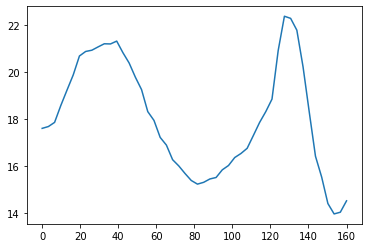

In [3]:
plt.plot(data[0]*160,-data[1])

In [4]:
with open(f"{home}/results/singleH.pkl","rb") as f: #single variable BI_KSG:(MI,H(Y|X)) from standard data
    singleH = pkl.load(f)

In [5]:
# with open(f"{home}/results/MI_subpop_MINE.pkl","rb") as f:
#     [Ns,I] = pkl.load(f)

In [11]:
with open(f"{home}/results/HYgX_trunc_C.pkl","rb") as f:
    [NsC,xC,HC] = pkl.load(f)
with open(f"{home}/results/HYgX_trunc_U.pkl","rb") as f:
    [NsU,xU,HU] = pkl.load(f)
assert np.all(NsC==NsU)
Ns = 109-NsC

In [7]:
MI = [Hrs.mean()-Hr.mean() for Hrs,Hr in zip(HC,HU)]

In [8]:
import torch
import bvcopula

n1, n2 = 14,23

device = "cuda:1"
with open(f"{home}/results/ex_{n1}_{n2}.pkl","rb") as f:
    data = pkl.load(f)
train_x = torch.tensor(data['X'],device=device).float()
train_y = torch.tensor(data['Y'],device=device).float()
# waic, model = bvcopula.infer(data['likelihoods'],train_x,train_y,device=device)

In [117]:
# import utils

# # visualize the result
# fig, ax = plt.subplots(1,2,figsize=(12, 2))

# testX = np.linspace(0,1,100)
# test_x = torch.tensor(testX).float().cuda(device=device)
    
# for a in ax:
#     a.axvline(120, color='black', alpha=0.5)
#     a.axvline(140, color='black', alpha=0.5)
#     a.axvline(160, color='black', alpha=0.5)
    
# name1, name2 = f"Neuron {data['n1']}", f"Neuron {data['n2']}"
    
# utils.Plot_MixModel_Param_MCMC(ax,model,test_x,testX*160,
#                                rho=np.array([160*data['x'],data['p']]),
#                                title='for {} vs {}'.format(name1,name2))

# plt.subplots_adjust(hspace=0.7)

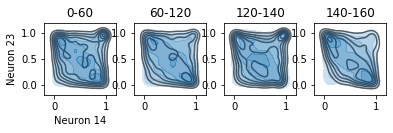

In [55]:
# visualize the result
fig = plt.figure(figsize=(5, 2))

bottom_axes = np.array([fig.add_axes([0,0,0.2,0.5]),
               fig.add_axes([0.25,0,0.2,0.5]),
               fig.add_axes([0.5,0,0.2,0.5]),
               fig.add_axes([0.75,0,0.2,0.5])])

plt.subplots_adjust(hspace=0.5)

bottom_axes[0].set_ylabel(name2)
bottom_axes[0].set_xlabel(name1)

interval_ends = [0,60,120,140,160]
utils.Plot_Copula_Density(bottom_axes, data['Xs'].squeeze()*160, data['Ys'].squeeze(), 
                          interval_ends, shade=True)
utils.Plot_Copula_Density(bottom_axes, data['X'].squeeze()*160, data['Y'], 
                          interval_ends, shade=False, color='#073763ff')

plt.subplots_adjust(wspace=0.5)

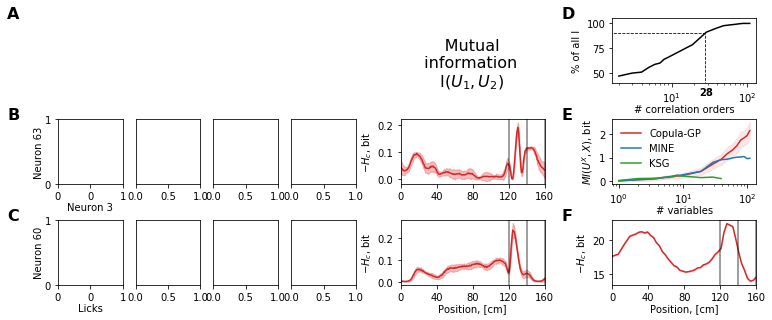

In [413]:
# fig, (trunc,subpop,Hrs) = plt.subplots(1,3,figsize=(15,2))

fig_width, fig_height = 10.2, 4.5
aspect = fig_width/fig_height
fig = plt.figure(figsize=(fig_width,fig_height))

l_mrg, b_mrg = 0.5/fig_width, aspect*0.4/fig_width
block_size = 2.8/fig_width
dens_size = .9/fig_width
plot_width, plot_height = 2.0/fig_width, dens_size*aspect
dens_y = b_mrg# + 1.4/fig_height
dens_blockX = dens_size*1.2
dens_blockY = 1.4/fig_height
MI_shift = 1.7*block_size

# ax0 = fig.add_axes([0,0,1,1])

def plot_exp(fig,n1,n2,n):
        
    with open(f"{home}/results/ex_{n1}_{n2}.pkl","rb") as f:
        data = pkl.load(f)
        
    name1, name2 = f"Neuron {data['n1']}", f"Neuron {data['n2']}"
    if n1==-2:
        name1 = 'Licks'
    
    ax_list = []
    for i in range(4):
        ax_list.append(fig.add_axes([l_mrg+i*dens_blockX,dens_y+dens_blockY*n,dens_size,dens_size*aspect]))
        if i>0:
            ax_list[-1].set_yticks([],[])
#     utils.Plot_Copula_Density(np.array(ax_list), data['Xs'].squeeze()*160, data['Ys'].squeeze(), 
#                               interval_ends, shade=True)
#     utils.Plot_Copula_Density(np.array(ax_list), data['X'].squeeze()*160, data['Y'], 
#                               interval_ends, shade=False, color='#073763ff')
    if n!=1:
        for i in range(4):
            ax_list[i].set_title('')
    ax_list[0].set_ylabel(name2,labelpad=1)
    ax_list[0].set_xlabel(name1,labelpad=1)
    
    ax_list[0].xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax_list[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax_list[0].set_yticks([0,1],minor=False)
    ax_list[0].set_yticklabels([0,1])

    MI = fig.add_axes([l_mrg + MI_shift,dens_y+dens_blockY*n,plot_width,plot_height])
    MI.plot(data["MI"][0],data["MI"][1],color='C3')
    MI.fill_between(data["MI"][0],(data["MI"][1]-data["MI"][2]),
                     (data["MI"][1]+data["MI"][2]),
                     alpha=0.3,color='C3')#,label="MI={:.2}±{:.1}".format(MI,dMI))
    # MI.set_title('MI between {} and {}'.format(name1,name2))
    if n==0:
        MI.set_xlabel('Position, [cm]',labelpad=1)
    for x in [120,140,160]:
        MI.axvline(x, color='black', alpha=0.5)
    MI.set_ylabel('$-H_c$, bit')
    MI.set_xlim(0,160)
    MI.set_xticks(np.arange(0,161,40),minor=False)
    MI.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    
# plot_exp(fig,14,23,2)
plot_exp(fig,3,63,1)
plot_exp(fig,-2,60,0)

##################################################################

fig.text(l_mrg+MI_shift+0.09*block_size,dens_y+dens_blockY+plot_height*1.5,
        "     Mutual\n information \n    $\mathrm{I}(U_1,U_2)$",fontsize=16)

fig.text(2.50*dens_blockX,dens_y+2*dens_blockY+0.1*plot_height,"   Reward",fontsize=14, color='white')
# fig.text(3.45*dens_blockX,dens_y+2*dens_blockY+0.1*plot_height,"   Late\n reward",fontsize=14, color='white')
fig.text(-0.02,dens_y+2*dens_blockY+plot_height,"A",fontsize=16,fontweight='bold')
fig.text(-0.02,dens_y+dens_blockY+plot_height,"B",fontsize=16,fontweight='bold')
fig.text(-0.02,dens_y+plot_height,"C",fontsize=16,fontweight='bold')

####################################################################

all_shift = MI_shift+1.05*block_size

fig.text(all_shift-0.02,dens_y+2*dens_blockY+plot_height,"D",fontsize=16,fontweight='bold')
fig.text(all_shift-0.02,dens_y+dens_blockY+plot_height,"E",fontsize=16,fontweight='bold')
fig.text(all_shift-0.02,b_mrg+plot_height,"F",fontsize=16,fontweight='bold')

trunc =  fig.add_axes([l_mrg + all_shift,b_mrg+2*dens_blockY,plot_width,plot_height])
subpop = fig.add_axes([l_mrg + all_shift,b_mrg+dens_blockY,plot_width,plot_height])
Hrs =    fig.add_axes([l_mrg + all_shift,b_mrg,plot_width,plot_height])

with open(f"{home}/results/HYgX_trunc_C.pkl","rb") as f:
    [NsC,xC,HC] = pkl.load(f)
Ns = 109-NsC
trunc.semilogx(Ns[:-1],[100*H.mean()/HC[0].mean() for H in HC[:-1]],color='k')

lines = [[(0, 90), (28, 90)], [(28, 0), (28, 90)]]
lc = mc.LineCollection(lines, colors='k', linestyle='dashed', linewidths=0.8)
trunc.add_collection(lc)
# trunc.semilogx(Ns[:-1],[100*H.mean()/HU[0].mean() for H in HU[:-1]])
trunc.text(23,28,'28',fontweight='bold')
trunc.set_xlabel('# correlation orders',labelpad=0)
trunc.set_ylabel('% of all I')
trunc.set_ylim(40,105)

with open(f"{home}/results/MI_subpop_C.pkl","rb") as f:
    [Ns,_,I] = pkl.load(f)
subpop.semilogx(Ns,[i[0] for i in I],color='C3', label='Copula-GP')
subpop.fill_between(Ns,[i[0]+i[1] for i in I],[i[0]-i[1] for i in I],color='C3',alpha=0.1)
with open(f"{home}/results/MI_subpop_MINE_C.pkl","rb") as f:
    [Ns,I] = pkl.load(f)
subpop.semilogx(Ns,I,color='C0', label = 'MINE')
with open(f"{home}/results/MI_subpop_KSG_C.pkl","rb") as f:
    [Ns,I] = pkl.load(f)
subpop.semilogx(Ns,I,color='C2', label = 'KSG')
subpop.set_xlabel('# variables',labelpad=0)
subpop.set_ylabel('$MI(U^X,X)$, bit')
subpop.legend(frameon=False)

# with open(f"{home}/results/HYgX_C.pkl","rb") as f:
#     data = pkl.load(f)
with open(f"{home}/results/HYgX_subpop_C.pkl","rb") as f:
    [_,xCs,HCs] = pkl.load(f)
Hrs.plot(xCs*160,-HCs[0],color='C3')
# Hrs.plot(xCs*160,-HCs[7],color='C0')
Hrs.fill_between(xCs*160,-HCs[0]-0.1,-HCs[0]+0.1,color='C3',alpha=0.1)
# Hrs.set_title('MI between $Y_1 \ldots Y_N$')
for x in [120,140,160]:
    Hrs.axvline(x, color='black', alpha=0.5)
Hrs.set_xlabel('Position, [cm]',labelpad=1)
Hrs.set_ylabel('$-H_c$, bit')
Hrs.set_xlim(0,160)
Hrs.set_xticks(np.arange(0,161,40),minor=False)
Hrs.xaxis.set_major_formatter(FormatStrFormatter('%d'))

fig.savefig(f'{home}/results/plots.svg', transparent=True)

In [411]:
# here starts the assembling using svgutils 
sc.Figure("20.4cm", "9cm", 
    sc.Panel(sc.SVG(f"{home}/results/fig/mouse.svg").scale(4.3).move(45,0)),
    sc.Panel(sc.SVG(f'{home}/results/plots.svg').move(20,0))
    ).save(f"{home}/results/compose.svg")
# SVG(f"{home}/results/compose.svg")

SVG(f"{home}/results/compose.svg")

In [288]:
# from train import conf
# animal = 'ST260'
# day_name = 'Day1'
# exp_pref = f'{animal}_{day_name}'
# import MI
# import time

# X,Y = utils.standard_loader(f"{conf.path2data}/{exp_pref}_standard.pkl")
# Ns = 109-np.array([70,80,90,100,101,102,103,104,105,106,107,108])
# I = []
# for n in Ns:
#     t1 = time.time()
#     I.append(MI.BI_KSG(X.reshape((*X.shape,1)),Y[...,:n])[0])
#     t2 = time.time()
#     print((t2-t1)//60,I[-1])
# with open(f"{home}/results/.pkl","wb") as f:
#     pkl.dump([Ns,I],f)

In [370]:
h = [h.mean() for h in HC]
h[8:]/h[0]

array([ 0.9124448 ,  0.78696567,  0.65910655,  0.64041615,  0.6017188 ,
        0.588901  ,  0.5585756 ,  0.511062  ,  0.50126565,  0.47161245,
       -0.        ], dtype=float32)

In [371]:
NsC[8:]

array([ 80,  90, 100, 101, 102, 103, 104, 105, 106, 107, 108])

In [373]:
10*(0.9124448-0.9)/(0.9124448-0.78696567)

0.9917824581665432

In [393]:
with open(f"{home}/results/MI_trunc_C.pkl","rb") as f:
    [Ns,_,I] = pkl.load(f)

EOFError: Ran out of input